# Question 02
For a given dataset predict number of bikes getting shared based on
temperature of the day \
https://drive.google.com/open?id=1ohN2o3zSZ2Xuy4CIdTWN-dTmciUXiz
st

In [43]:
# Importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler as SS
SS=SS()
from sklearn.metrics import *
%matplotlib inline

In [2]:
# Reading in the data
try:
    data = pd.read_csv("bike_sharing.csv")
except Exception as e:
    print(f"Error : {e}")

### Data Processing and Analysis

In [5]:
data.sample(5)   # Printing the first 5 rows of data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6910,6911,2011-10-20,4,0,10,13,0,4,1,1,0.50,0.4848,0.45,0.5821,28,136,164
5246,5247,2011-08-11,3,0,8,12,0,4,1,1,0.78,0.6818,0.31,0.2537,50,164,214
13868,13869,2012-08-06,3,1,8,1,0,1,1,1,0.72,0.6970,0.79,0.0896,1,10,11
4432,4433,2011-07-08,3,0,7,14,0,5,1,2,0.80,0.7879,0.63,0.3582,53,163,216
10824,10825,2012-04-01,2,1,4,3,0,0,0,2,0.34,0.3333,0.81,0.1343,4,21,25


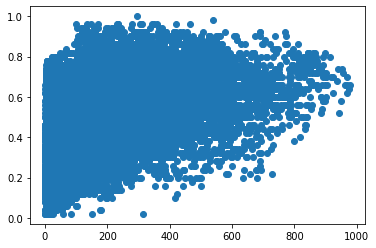

In [6]:
plt.scatter(data['cnt'], data['temp'])
plt.show()

In [9]:
df = data[['temp', 'cnt']]

In [10]:
df.head()   # Printing the first 5 rows of data

,temp,cnt
0,0.24,16
1,0.22,40
2,0.22,32
3,0.24,13
4,0.24,1


In [11]:
df.tail()   # Printing the last 5 rows of data

,temp,cnt
17374,0.26,119
17375,0.26,89
17376,0.26,90
17377,0.26,61
17378,0.26,49


In [12]:
df.shape

(17379, 2)

array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'cnt'}>]], dtype=object)

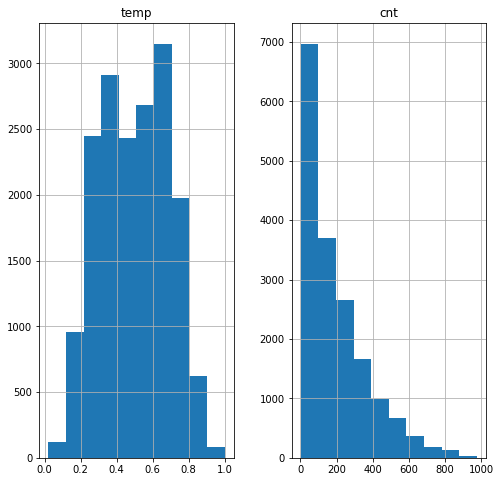

In [14]:
df.hist(figsize=(8,8))

In [15]:
df.describe()       # Generating statistical summary of the data

,temp,cnt
count,17379.000000,17379.000000
mean,0.496987,189.463088
std,0.192556,181.387599
min,0.020000,1.000000
25%,0.340000,40.000000
50%,0.500000,142.000000
75%,0.660000,281.000000
max,1.000000,977.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    17379 non-null  float64
 1   cnt     17379 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 271.7 KB


In [ ]:
# visual representation of the data to find any observable relationships between provided attributes
plt.scatter(df['cnt'], df['atemp'])
plt.show()

In [17]:
df.dtypes       # Checking the data types of the columns

temp    float64
cnt       int64
dtype: object

In [18]:
df.loc[:,"cnt"] = df.loc[:,"cnt"].astype(dtype="float64")

C:\Users\zeesh\AppData\Local\Temp\ipykernel_33524\872077335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"cnt"] = df.loc[:,"cnt"].astype(dtype="float64")


In [19]:
df.dtypes 

temp    float64
cnt     float64
dtype: object

In [ ]:
df.isnull().any()   # Checking the data for null values

<AxesSubplot:>

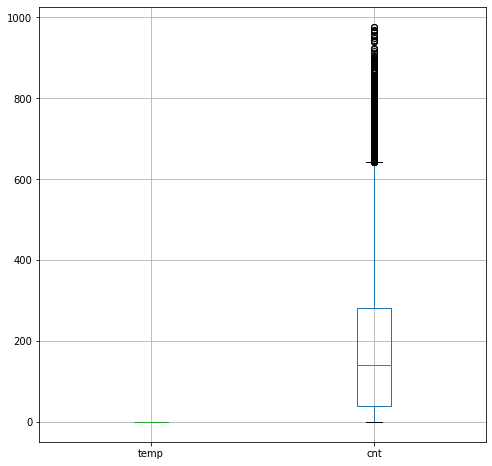

In [20]:
# Boxplot to find the outliers in the columns
df.boxplot(figsize=(8,8))

In [21]:
# Function to remove the outliers from the whole dataset
def remove_outlier(data):
    quant_df = data.quantile([0.10, 0.90])
    for name in list(data.columns): data = data[(data[name] > quant_df.loc[0.10, name]) & (data[name] < quant_df.loc[0.90, name])]
    return data

In [22]:
df = remove_outlier(df)

<AxesSubplot:>

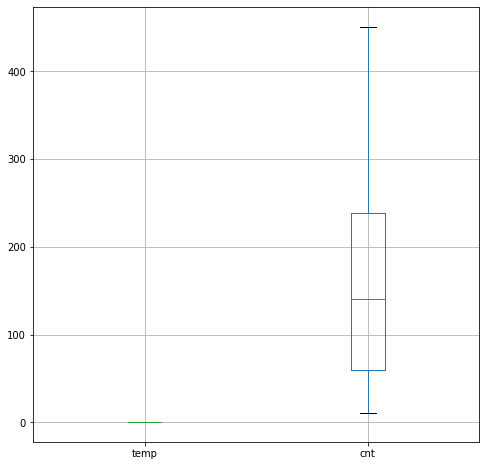

In [24]:
# Boxplot to find the outliers in the columns
df.boxplot(figsize=(8,8))

In [23]:
df.isna().sum()

temp    0
cnt     0
dtype: int64

array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'cnt'}>]], dtype=object)

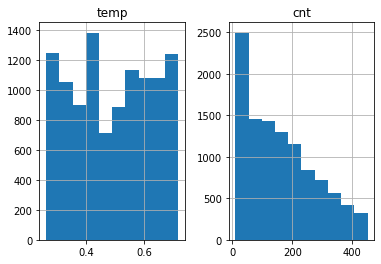

In [25]:
df.hist()

In [26]:
df.describe()

,temp,cnt
count,10702.000000,10702.000000
mean,0.490469,160.876098
std,0.139519,115.742892
min,0.260000,10.000000
25%,0.360000,60.000000
50%,0.500000,141.000000
75%,0.620000,239.000000
max,0.720000,451.000000


> Visualizing the data to check for skewness and reduce it

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

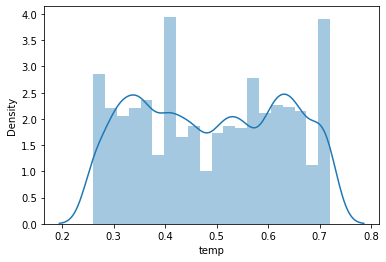

In [28]:
sn.distplot(df['temp'])

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

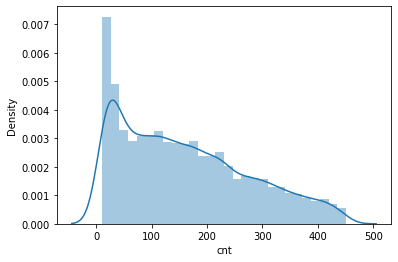

In [29]:
sn.distplot(df['cnt'])

In [30]:
df.skew()

temp    0.013108
cnt     0.578059
dtype: float64

Skewness is -0.022909651310383847
Mean is 11.715447844196284 , Median is  11.874342087037917


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


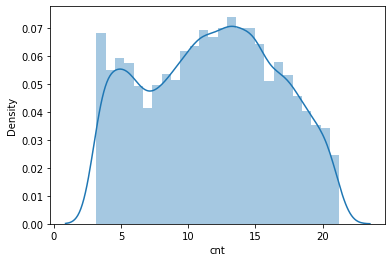

In [38]:
target = (np.sqrt((df['cnt'])))
print ('Skewness is', target.skew())
print("Mean is",target.mean(), ", Median is ", target.median())
sn.distplot(target)
df['cnt'] = target

Skewness is -0.15202026210130773
Mean is 0.6929269327631261 , Median is  0.7071067811865476


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

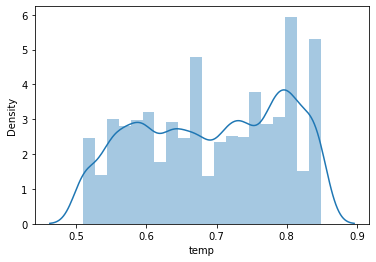

In [36]:
target = (np.sqrt((df['temp'])))
print ('Skewness is', target.skew())
print("Mean is",target.mean(), ", Median is ", target.median())
sn.distplot(target)
# df['YearsExperience'] = target

In [39]:
df.skew()

temp    0.013108
cnt    -0.022910
dtype: float64

In [41]:
df.describe()

,temp,cnt
count,10702.000000,10702.000000
mean,0.490469,11.715448
std,0.139519,4.860719
min,0.260000,3.162278
25%,0.360000,7.745967
50%,0.500000,11.874342
75%,0.620000,15.459625
max,0.720000,21.236761


In [45]:
from sklearn.preprocessing import *
# trying with scaling the output too output :
# Y = X['y']
rs = RobustScaler().fit(df)
for item in df:
    df[item]=rs.fit_transform(np.array(df[item]).reshape(-1,1))
# X['y']=Y

In [47]:
df.describe()

,temp,cnt
count,10702.000000,10702.000000
mean,-0.036657,-0.020599
std,0.536613,0.630144
min,-0.923077,-1.129434
25%,-0.538462,-0.535203
50%,0.000000,0.000000
75%,0.461538,0.464797
max,0.846154,1.213746


### Train/Test Split

In [49]:
X = np.array(df['temp']).reshape(-1, 1)
y = np.array(df['cnt']).reshape(-1, 1)


In [50]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Model Fitting and Training

In [51]:
try:
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    print(regr.score(X_test, y_test))
except Exception as e:
    print(f"Error : {e}")

0.032672308682711204


### Model Testing

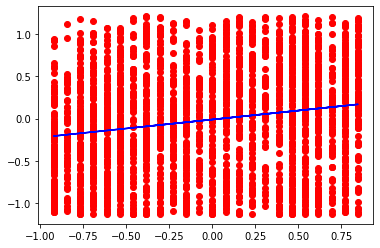

In [53]:
try:
    y_pred = regr.predict(X_test)
    plt.scatter(X_test, y_test, color ='red')
    plt.plot(X_test, y_pred, color ='blue')
    plt.show()
except Exception as e:
    print(f"Error : {e}")

### Evaluation Metrics

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.5245333670978385
MSE: 0.38990505432221917
RMSE: 0.6244237778321859


In [55]:
Accuracy = (1-mse)*100

In [56]:
print(Accuracy)

61.00949456777809
